# 1. Dataset
* id: danh sách ID
* name: danh sách tên
* host_id: ID host
* host_name: tên host
* neighbourhood_group: địa điểm
* neighbourhood: khu vực
* latitude: vĩ độ
* longitude: kinh độ
* room_type: danh sách kiểu phòng
* price: giá tính bằng đô
* minimum_nights: số đêm tối thiểu
* number_of_reviews: lượt review
* last_review: mới review
* reviews_per_month: số lần review mỗi tháng
* calculated_host_listings_count: danh sách mỗi host
* availability_365: số ngày có thể book

In [1]:
# Them thu vien

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 2. EDA

In [2]:
# Doc file data

data = pd.read_csv('AB_NYC_2019.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
# Bo di nhung cot khong can

data.drop(['id','host_name','last_review'], axis=1, inplace=True)

# Tong cac gia tri bi thieu o moi cot

data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
# Thay NaN trong 'reviews_per_month' bang 0

data.fillna({'reviews_per_month':0}, inplace=True)

# Kiem tra data

(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Bo di price = 0

data = data.loc[data['price'] > 0]

# Kiem tra data

data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Giai ma du lieu bang cach phan loai

data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])

data_encoded.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

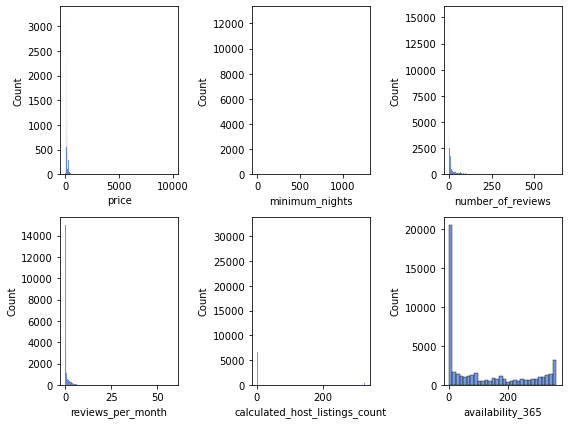

In [7]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.histplot(data['price'])

subplot(2,3,2)
sns.histplot(data['minimum_nights'])

subplot(2,3,3)
sns.histplot(data['number_of_reviews'])

subplot(2,3,4)
sns.histplot(data['reviews_per_month'])

subplot(2,3,5)
sns.histplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.histplot(data['availability_365'])

plt.tight_layout()

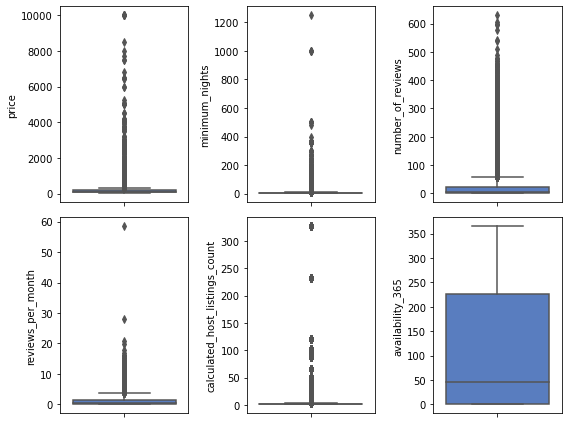

In [8]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout()
plt.draw()

C:\Users\Long\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


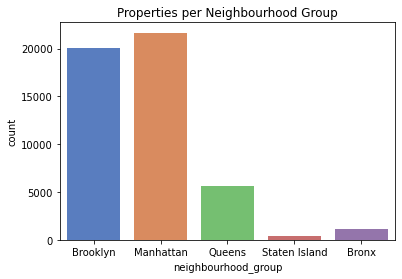

In [9]:
title = 'Properties per Neighbourhood Group'
sns.countplot(data['neighbourhood_group'])
plt.title(title)
plt.ioff()

Hầu hết các bất động sản nằm ở Brooklyn và Manhattan.

C:\Users\Long\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


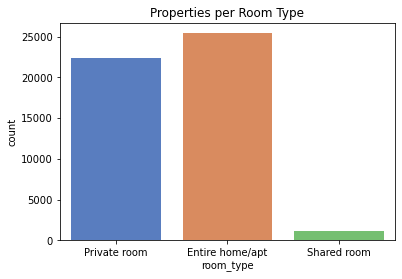

In [10]:
title = 'Properties per Room Type'
sns.countplot(data['room_type'])
plt.title(title)
plt.ioff()

Hầu hết các tài sản là nhà nguyên căn hoặc phòng riêng.

# 3. Build model 1

## 3.1 Data Preprocessing

In [11]:
# Load data

data.drop(['name'], axis=1, inplace=True)
data_copy = data.copy()

# Bien doi log10

data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])

# Ma hoa du lieu phan loai

data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

# loc ra gia tu 50 den 175

data_filtered_low = data.loc[(data['price'] < 175)]

# Loc ra gia cao hon 175

data_filtered_high = data.loc[(data['price'] > 175)]

## 3.2 Hồi quy tuyến tính

### 3.2.1 Model tập giá thấp

In [12]:
# Chia data

X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy tuyen tinh vao tap train

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = lr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,60.0
1,85.0,72.0
2,84.0,117.0
3,75.0,61.0
4,169.0,154.0
5,50.0,59.0
6,45.0,64.0
7,95.0,103.0
8,70.0,62.0
9,58.0,62.0


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.14
R2 score train: 0.54
R2 score test: 0.52


### 3.2.2 Model giá tập cao

In [14]:
# Chia data

X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy tuyen tinh vao tap train

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = lr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,274.0
1,195.0,234.0
2,197.0,253.0
3,299.0,267.0
4,190.0,245.0
5,250.0,253.0
6,180.0,316.0
7,300.0,337.0
8,1000.0,271.0
9,180.0,251.0


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.09
R2 score test: 0.05


## 3.3 Random Forest

### 3.3.1 Model tập giá thấp

In [16]:
# Chia data

X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung Random Forest vao tap train

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = rfr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,84.0
2,84.0,123.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,61.0
7,95.0,107.0
8,70.0,57.0
9,58.0,80.0


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.62
R2 score test: 0.55


### 3.3.2 Model tập giá cao

In [18]:
# Chia data

X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy Random Forest vao tap train

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = rfr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,297.0
1,195.0,243.0
2,197.0,255.0
3,299.0,254.0
4,190.0,262.0
5,250.0,261.0
6,180.0,290.0
7,300.0,286.0
8,1000.0,251.0
9,180.0,242.0


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.19
R2 score train: 0.29
R2 score test: 0.16


# 4. Build model 2

Bin data

## 4.1 Data Preprocessing

In [20]:
data_encoded.drop(['name'], axis=1, inplace=True)

# Ma hoa data bang phan loai

data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood_group'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['room_type'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['minimum_nights'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['number_of_reviews'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['reviews_per_month'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['calculated_host_listings_count'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['availability_365'], drop_first=True)

# loc ra gia tu 50 den 175

data_filtered_low = data_encoded.loc[(data['price'] < 175)]

# Loc ra gia cao hon 175

data_filtered_high = data_encoded.loc[(data['price'] > 175)]

## 4.2 Hồi quy tuyến tính

### 4.2.1 Model tập giá thấp

In [21]:
# Chia data

X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy nhieu bien vao tap train

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = lr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,60.0
1,85.0,72.0
2,84.0,107.0
3,75.0,61.0
4,169.0,153.0
5,50.0,59.0
6,45.0,61.0
7,95.0,99.0
8,70.0,63.0
9,58.0,63.0


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.14
R2 score train: 0.54
R2 score test: 0.51


### 4.2.2 Model tập giá cao

In [23]:
# Chia data

X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy nhieu bien vao tap train

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = lr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,263.0
1,195.0,232.0
2,197.0,256.0
3,299.0,238.0
4,190.0,245.0
5,250.0,260.0
6,180.0,319.0
7,300.0,333.0
8,1000.0,238.0
9,180.0,215.0


In [24]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.09
R2 score test: 0.04


## 4.3 Random Forest

### 4.3.1 Model tập giá thấp

In [25]:
# Chia data

X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy Random Forest vao tap train

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = rfr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,74.0
2,84.0,117.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,60.0
7,95.0,107.0
8,70.0,59.0
9,58.0,72.0


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.6
R2 score test: 0.54


### 4.3.2 Model tập giá cao

In [27]:
# Chia data

X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

# Chia thanh tap train va tap test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Ap dung hoi quy Random Forest vao tap train

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Du doan ket qua tap test

y_pred = rfr.predict(X_test)

# So sanh gia tri du doan va thuc te

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,274.0
1,195.0,239.0
2,197.0,271.0
3,299.0,241.0
4,190.0,240.0
5,250.0,292.0
6,180.0,300.0
7,300.0,272.0
8,1000.0,242.0
9,180.0,233.0


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.22
R2 score test: 0.09


# 5. Kết luận

* Sự thay đổi tiêu chuẩn giá trên data là khá cao.
* Việc tách data theo các loại giá là hữu ích cho việc phân tích.
* Các biến đáng quan tâm liên quan đến dự đoán giá là:
** Vị trí
** Loại phòng
** count_host_listings_count
** Số lượt đánh giá
* Các model dự đoán giá không hoạt động tốt:
** Điểm tốt nhất là 0,55
** Dự đoán không chính xác với mức giá dưới $ 175 (75% data)
** Sử dụng dữ liệu phân loại theo phân loại không cải thiện model